## Problem 1

### Question 1,2

In [0]:
import numpy as np
import tensorflow  as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import fully_connected
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import cm
from sklearn.manifold import TSNE
import pandas as pd

In [4]:
#Loading Dataset
mnist = input_data.read_data_sets("MNIST_data", one_hot=False)

#Number of hidden layers
n_hl = 5

#Number of neurons in each layer = 1024
n_nodes_hl = [1024]*n_hl

#size of vector of each sample
n_inputs = 28*28

#Number of output classes
n_class = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
#Declaring X, y placefolder for input and output
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X") 
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [6]:
#Neural Network with specified hidden layers 
with tf.name_scope("dnn"):
  
  hidden_layer = [0]*n_hl
  
  hidden_layer[0] = fully_connected(X, n_nodes_hl[0])
    
  for i in range(1,n_hl):
    hidden_layer[i] = fully_connected(hidden_layer[i-1],n_nodes_hl[i])
  
  last_hl = hidden_layer[-1]
  
  logits = fully_connected(hidden_layer[-1], n_class, activation_fn=None)
  logits_sm = tf.nn.softmax(logits)  #softmax output
  

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Cross entropy
with tf.name_scope("loss"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
  loss = tf.reduce_mean(xentropy, name="loss")
  

#### Cross entropy
We use cross entropy as a loss function as this is a classification problems and the probabilities of the output are calculated

In [0]:
learning_rate = 0.001

with tf.name_scope("train"):
  optimizer = tf.train.AdamOptimizer(learning_rate)
  training_op = optimizer.minimize(loss)


In [0]:
with tf.name_scope("eval"):
  correct = tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) 

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()


In [11]:
#Training the NN
n_epochs = 100
batch_size = 50

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
    acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y:mnist.test.labels})
    if epoch % 10 == 0:
      print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    
  save_path = saver.save(sess, "./mnist_model.ckpt")


0 Train accuracy: 0.98 Test accuracy: 0.9578
10 Train accuracy: 1.0 Test accuracy: 0.9792
20 Train accuracy: 1.0 Test accuracy: 0.9833
30 Train accuracy: 1.0 Test accuracy: 0.9791
40 Train accuracy: 1.0 Test accuracy: 0.9835
50 Train accuracy: 0.98 Test accuracy: 0.9825
60 Train accuracy: 1.0 Test accuracy: 0.983
70 Train accuracy: 1.0 Test accuracy: 0.9789
80 Train accuracy: 1.0 Test accuracy: 0.9801
90 Train accuracy: 1.0 Test accuracy: 0.9826


### Question 3

#### Observation
We can observe that most of the number are correctly classfied by taking output of the last layer and passing it throught softmax function. The numbers which are incorrectly classified resemble the ones they have been classified to. For e.g.- Few of the 4s have been classified as 9. One of the 2 is classified as 8, this could be attributed to big circle in its figure. 

In [12]:
with tf.Session() as sess:
  saver.restore(sess, "./mnist_model.ckpt")
  X_new = mnist.test.images[:1000]
  y_new = mnist.test.labels[0:1000]
  Z = logits_sm.eval(feed_dict={X:X_new})
  
  pred = []
  classes = np.arange(0,10)
  ind_dict = {c:[] for c in classes}
  for i in range(len(Z)):
    p = np.argmax(Z[i])
    pred.append(p)
    ind_dict[p].append(i)


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./mnist_model.ckpt


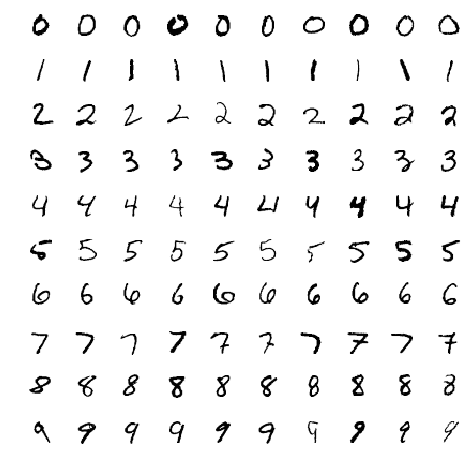

In [13]:
fig, ax = plt.subplots(10, 10, sharex='col', sharey='row', figsize=(8,8))
fig.subplots_adjust(hspace=0.5)

for r in range(0,10):
  for c in range(0,10):
    ax[r,c].imshow(X_new[ind_dict[r][c]].reshape((28,28)))
    ax[r,c].axis('off')

    

### Question 4

### Observation
We can observe that by taking random 10 elements from vector of 1024 elements (in this case 1st 10) from the output of the last hidden layer, we cannot attribute to any given label, this is because all 1024 elements are important in classifying the input to a given label. It is very difficult to randomly select 10 elements from a output of each layer for a sample and predict the output. 

In [14]:
with tf.Session() as sess:
  saver.restore(sess, "./mnist_model.ckpt")
  hidden_layer_tf = tf.convert_to_tensor(hidden_layer)
  hidden_layer_tf2 = hidden_layer_tf.eval(feed_dict={X:X_new})

  Z1 = hidden_layer_tf2[-1][:,0:10]
  
  pred = []
  classes = np.arange(0,10)
  ind_dict2 = {c:[] for c in classes}
  for i in range(len(Z1)):
    p = np.argmax(Z1[i])
    pred.append(p)
    ind_dict2[p].append(i)
 

INFO:tensorflow:Restoring parameters from ./mnist_model.ckpt


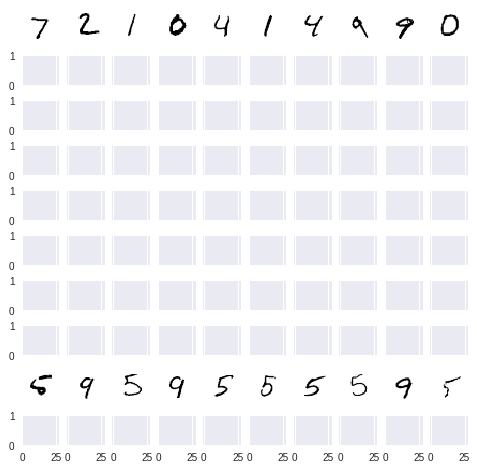

In [15]:
fig, ax = plt.subplots(10, 10, sharex='col', sharey='row', figsize=(8,8))
fig.subplots_adjust(hspace=0.5)

for r in range(0,10):
  arg = min(len(ind_dict2[r]),10)
  for c in range(arg):
    ax[r,c].imshow(X_new[ind_dict2[r][c]].reshape((28,28)))
    ax[r,c].axis('off')

### Question 6
#### Observation
**PCA** <br>
We can see that, on doing PCA on the input (1000 samples), we can observe no seperation in between the data points on the basis of 2 principal components, i.e. it is very hard to differentiate the data by just looking at input. We can also see that the two components explain only ~17% of the variance in the data.<br>
**TSNE** <br>
Similarly for TSNE,  even though we see a better seperation, it is hard to classify the data into label by just looking at the input.

In [0]:
#PCA
#Function to implement PCA on  the input and plot graph between the 2components
def pca_op(data):
  pca = PCA(n_components = 2)
  X2D_pca = pca.fit_transform(data)
  
  for i in range(X2D_pca.shape[0]):
    X2D_pca[i] = X2D_pca[i]+y_new[i]
    
  X2D_pca_df = pd.DataFrame(X2D_pca)
  y_new_df = pd.DataFrame(y_new)
  X2D_pca_df = pd.concat([X2D_pca_df, y_new_df], axis=1)
  X2D_pca_df.columns = ['X1','X2','label']
  X2D_pca_df.head()
  label_pca_df = X2D_pca_df.groupby('label').mean()
  
  print('Explained variance:', sum(pca.explained_variance_ratio_))
  
  plt.scatter(X2D_pca_df['X1'],X2D_pca_df['X2'], c=X2D_pca_df['label'], cmap=plt.get_cmap("tab10", 10))
  X2D_pca_df = pd.DataFrame(X2D_pca)
  for i in range(0,10):
    xlab = label_pca_df[label_pca_df.index==i]['X1']
    ylab = label_pca_df[label_pca_df.index==i]['X2']
    plt.annotate(s=i, xy=(xlab,ylab), size = 20, weight = "bold")
  plt.colorbar()
  plt.show()
  

Explained variance: 0.1781565174460411


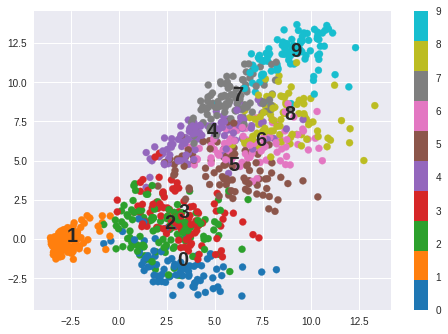

In [31]:
pca_op(X_new)

In [0]:
#TSNE
def tsne_op(data):
  sne = TSNE(n_components=2)
  X2D_tsne = sne.fit_transform(data)
  
  X2D_tsne_df = pd.DataFrame({'X1':X2D_tsne[:,0], 'X2':X2D_tsne[:,1], 'y':y_new})
  
  #X2D_tsne_df = pd.DataFrame(X2D_tsne)
  #y_new_df = pd.DataFrame(y_new)
  #X2D_tsne_df = pd.concat([X2D_tsne_df, y_new_df], axis=1)
  #X2D_tsne_df.columns = ['X1','X2','label']
  #X2D_tsne_df.head()
  label_tsne_df = X2D_tsne_df.groupby('y').mean()
  
  #plt.scatter(X2D_tsne[:,0],X2D_tsne[:,1], c=y_new, cmap=plt.get_cmap("tab10", 10))
  plt.scatter(X2D_tsne_df['X1'],X2D_tsne_df['X2'], c=X2D_tsne_df['y'], cmap=plt.get_cmap("tab10", 10))
  X2D_tsne_df = pd.DataFrame(X2D_tsne)
  for i in range(0,10):
    xlab = label_tsne_df[label_tsne_df.index==i]['X1']
    ylab = label_tsne_df[label_tsne_df.index==i]['X2']
    plt.annotate(s=i, xy=(xlab,ylab), size = 20, weight = "bold")
  plt.colorbar()
  plt.show()
  
  
  

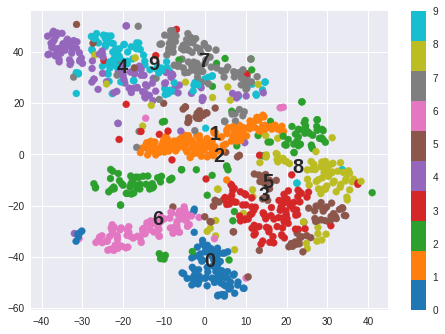

In [33]:
tsne_op(X_new)

### Question 7
#### Observation 
The operations performed using biases, weights and activation function of the first layer shift the data in such a way that it more easily differentiated. <br>
**PCA** <br>
We still do not see a discernible difference on the basis of clusters formed using PCA so classifying on the basis output of the first hidden layer is also not possible. The variance explained is ~33% which makes  it unreliable to make a prediction based on the output of this layer. <br>
**TSNE** <br>
We can see better clusters than the ones formed using the input data. This is however still not reliable for classification.

Explained variance: 0.33602411299943924


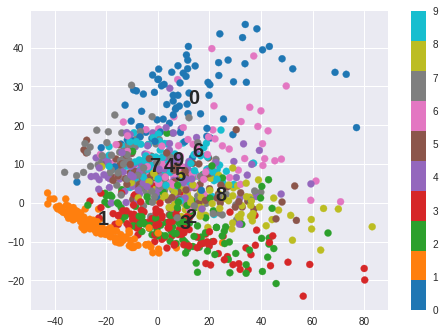

In [34]:
pca_op(hidden_layer_tf2[0])


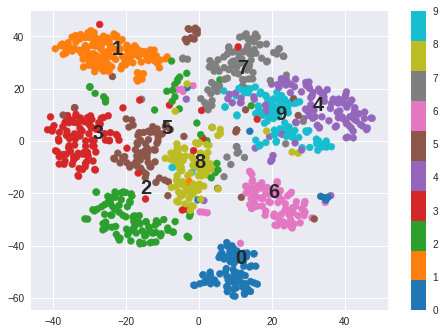

In [35]:
tsne_op(hidden_layer_tf2[0])

### Question 8

####  Observation
As the layers progress we can see the points attributed to a label being more discernable, this can be explained by combination of weights which react together to a particular stroke acting together to construct a part of a handwritten number. These weights are adjusted by minimizing the cross entropy using backpropogation. <br>
**PCA** <br>
We can see that the all the layers progress we can see points attributed to a particular label form discernable clusters which is useful to differentiate the label. We can observe that the variance explaine by two principal components increasing with each layer making the data more discernible. The principal components of the last hidden layer explain ~60% of the variance in the data making it the most feasible<br>
**TSNE** <br>
The clusters formed using the output of each subsequent layer are more and more distinct. Each layer is combines the feature of the handwritten digits to form distinct strokes which are distinct and hence form differentiable clusters.


Explained variance: 0.3422151654958725


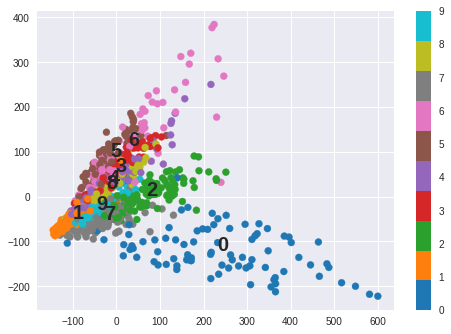

In [36]:
pca_op(hidden_layer_tf2[1])

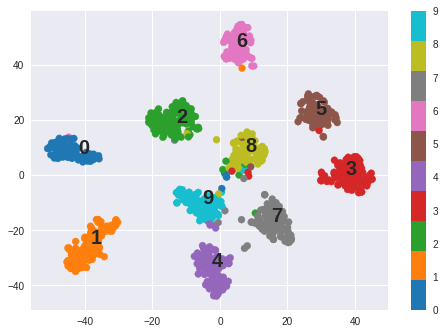

In [37]:
tsne_op(hidden_layer_tf2[1])

Explained variance: 0.4279194474220276


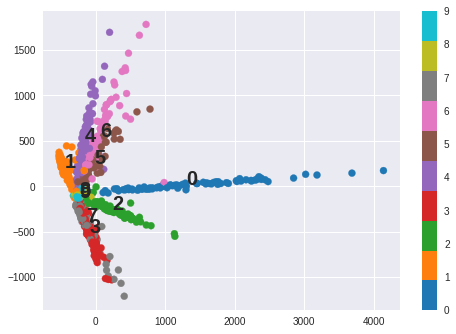

In [38]:
pca_op(hidden_layer_tf2[2])

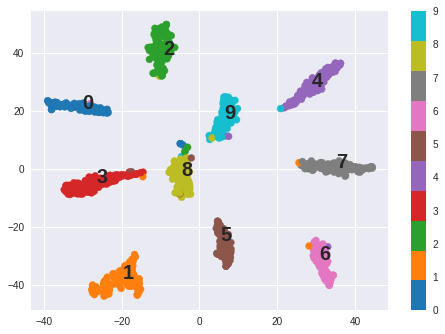

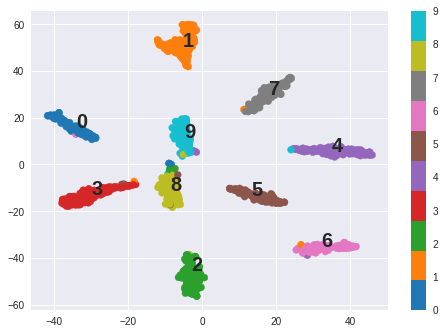

In [39]:
tsne_op(hidden_layer_tf2[2])

Explained variance: [0.40495977 0.18803199]


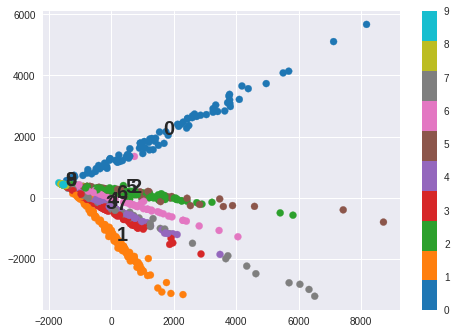

Explained variance: 0.5929915755987167


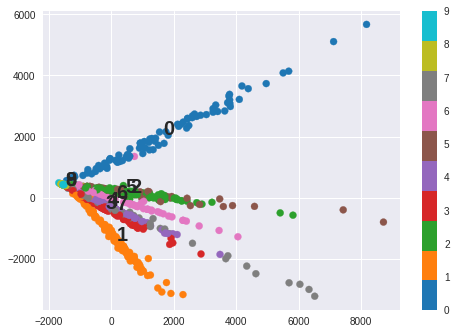

In [40]:
pca_op(hidden_layer_tf2[3])

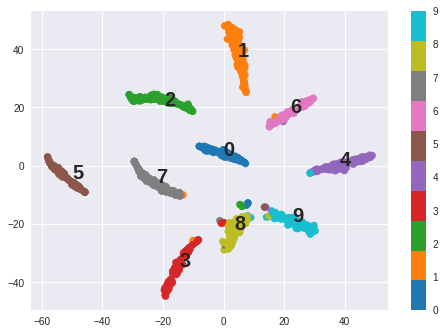

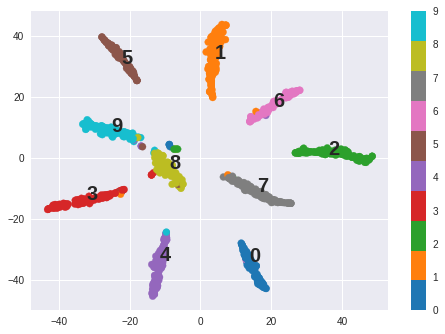

In [41]:
tsne_op(hidden_layer_tf2[3])

Explained variance: [0.3446206  0.26418126]


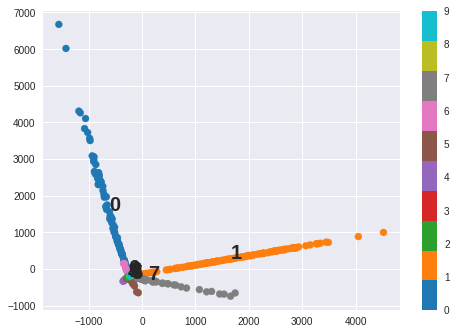

Explained variance: 0.608801931142807


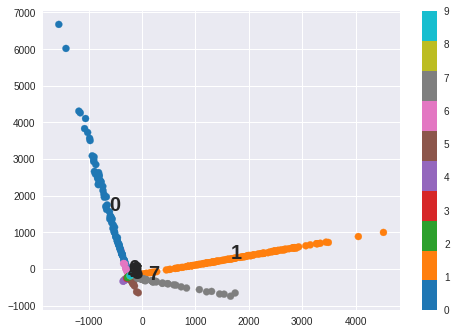

In [42]:
pca_op(hidden_layer_tf2[4])

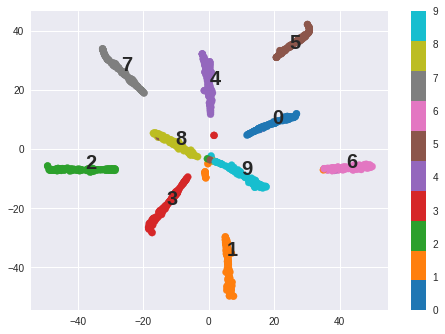

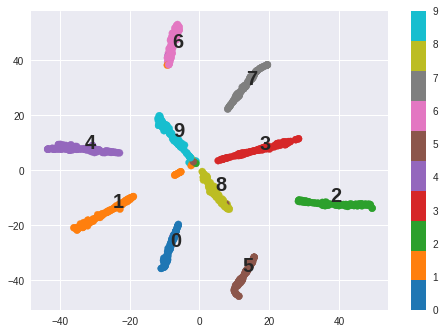

In [43]:
tsne_op(hidden_layer_tf2[4])